# The Breast Cancer Dataset:
This is a Breast Cancer Data Set with 286 instances of real patient data obtained from the Institute of Oncology, Ljubljana. The data set is publicly available from UCI Machine Learning repository and has the following variables:

Age: age of the patient at the time of diagnosis;

Menopause: whether the patient is pre- or postmenopausal at time of diagnosis;

Tumor size: the greatest diameter (in mm) of the excised tumor;

Inv-nodes: the number (range 0 - 39) of axillary lymph nodes that contain metastatic breast cancer visible on histological examination;

Node caps: if the cancer does metastasise to a lymph node, although outside the original site of the tumor it may remain “contained” by the capsule of the lymph node. However, over time, and with more aggressive disease, the tumor may replace the lymph node and then penetrate the capsule, allowing it to invade the surrounding tissues;

Degree of malignancy: the histological grade (range 1-3) of the tumor. Tumors that are grade 1 predominantly consist of cells that, while neoplastic, retain many of their usual characteristics. Grade 3 tumors predominately consist of cells that are highly abnormal;

Breast: breast cancer may obviously occur in either breast;

Breast quadrant: the breast may be divided into four quadrants, using the nipple as a central point;

Irradiation: radiation therapy is a treatment that uses high-energy x-rays to destroy cancer cells. 


# Import Libraries

In [1]:
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
import pickle

# Load and Explore Data

In [2]:
cols_names = ['Class', 'age', 'menopause', 'tumor-size',
              'inv-nodes', 'node-caps', 'deg-malig', 'breast',
              'breast-quad', 'irradiat'] # read the data names

breast_cancer_data = pd.read_csv('breast-cancer.data',
                 header=None, names=cols_names, na_values=["?"]) # NaN are represented by '?' 

breast_cancer_data.head() #print first 50 rows

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [3]:
#Information about the data columns
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
Class          286 non-null object
age            286 non-null object
menopause      286 non-null object
tumor-size     286 non-null object
inv-nodes      286 non-null object
node-caps      278 non-null object
deg-malig      286 non-null int64
breast         286 non-null object
breast-quad    285 non-null object
irradiat       286 non-null object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


In [4]:
breast_cancer_data.isna().any() #check for null values in dataset

Class          False
age            False
menopause      False
tumor-size     False
inv-nodes      False
node-caps       True
deg-malig      False
breast         False
breast-quad     True
irradiat       False
dtype: bool

In [5]:
breast_cancer_data.isna().any() #check for null values in dataset

Class          False
age            False
menopause      False
tumor-size     False
inv-nodes      False
node-caps       True
deg-malig      False
breast         False
breast-quad     True
irradiat       False
dtype: bool

In [6]:
# check for unique class to classify or predict
breast_cancer_data['Class'].unique()

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

In [7]:
breast_cancer_data.describe(include='object') #check the data statistics

,Class,age,menopause,tumor-size,inv-nodes,node-caps,breast,breast-quad,irradiat
count,286,286,286,286,286,278,286,285,286
unique,2,6,3,11,7,2,2,5,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,left,left_low,no
freq,201,96,150,60,213,222,152,110,218


In [8]:
# check for unique class to classify or predict value counts
breast_cancer_data['Class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

# Feature Engineering

In [9]:
# drop the missing colums in the dataset
breast_cancer_data.dropna(axis=0, inplace=True) #drop the rows that contains missing values

breast_cancer_data.isnull().sum() #check for null values

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [10]:
# check for unique class to classify or predict value counts
breast_cancer_data['Class'].value_counts()

no-recurrence-events    196
recurrence-events        81
Name: Class, dtype: int64

In [11]:
# check for age value counts
breast_cancer_data['age'].value_counts()

50-59    91
40-49    89
60-69    55
30-39    36
70-79     5
20-29     1
Name: age, dtype: int64

In [12]:
#Encoding categorical data
categorical_features = breast_cancer_data[['menopause', 'node-caps', 'breast', 'breast-quad', 'irradiat']]

menopause_label = LabelEncoder() #initialize menopause encoder
node_caps_label = LabelEncoder() #initialize node caps encoder
breast_label = LabelEncoder() #initialize breast encoder
breast_quad_label = LabelEncoder() #initialize breast quadrant encoder
irradiat_label = LabelEncoder() #initialize irradiation encoder
tumor_size_label = LabelEncoder() #initialize tumor size encoder
inv_node_label = LabelEncoder() #initialize inv nodes encoder
age_label = LabelEncoder() #initialize age encoder

#convert categorical data to numerical using LabelEncoder
breast_cancer_data['menopause'] = menopause_label.fit_transform(breast_cancer_data['menopause']) 
breast_cancer_data['node-caps'] = node_caps_label.fit_transform(breast_cancer_data['node-caps']) 
breast_cancer_data['breast'] = breast_label.fit_transform(breast_cancer_data['breast']) 
breast_cancer_data['breast-quad'] = breast_quad_label.fit_transform(breast_cancer_data['breast-quad']) 
breast_cancer_data['irradiat'] = irradiat_label.fit_transform(breast_cancer_data['irradiat']) 
breast_cancer_data['tumor-size'] = tumor_size_label.fit_transform(breast_cancer_data['tumor-size']) 
breast_cancer_data['inv-nodes'] = inv_node_label.fit_transform(breast_cancer_data['inv-nodes']) 
breast_cancer_data['age'] = age_label.fit_transform(breast_cancer_data['age']) 

In [13]:
breast_cancer_data.head() #print first few rows

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,1,2,5,0,0,3,0,1,0
1,no-recurrence-events,2,2,3,0,0,2,1,4,0
2,no-recurrence-events,2,2,3,0,0,2,0,1,0
3,no-recurrence-events,4,0,2,0,0,2,1,2,0
4,no-recurrence-events,2,2,0,0,0,2,1,3,0


In [14]:
breast_cancer_data['Class'].unique() #check the various fields in class we predicting

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

In [15]:
# Reformat Column We Are Predicting
breast_cancer_data['Class'] = breast_cancer_data['Class'].map({'no-recurrence-events':0, 'recurrence-events':1})

# Data Visualization

Class
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

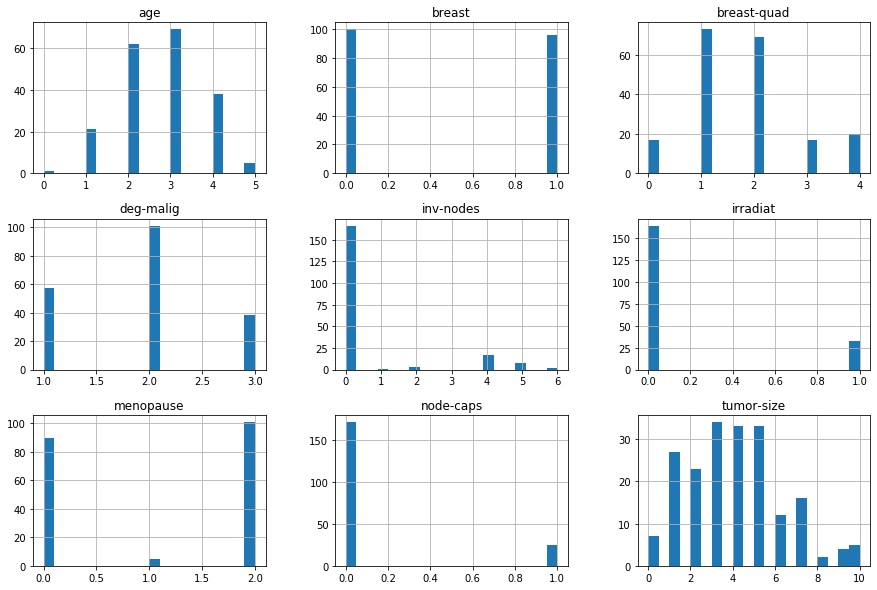

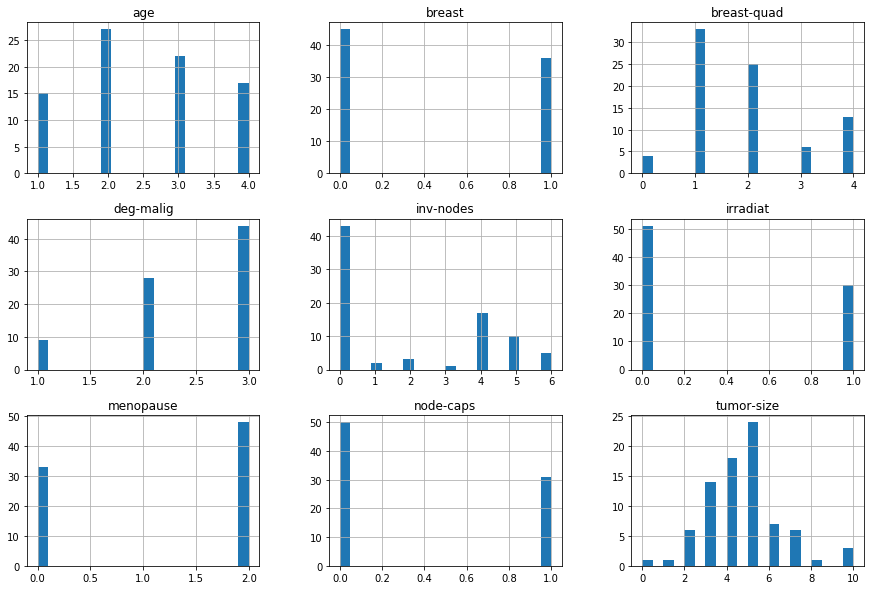

In [16]:
breast_cancer_data.groupby('Class').hist(bins=20, figsize=(15,10)) #visualize data

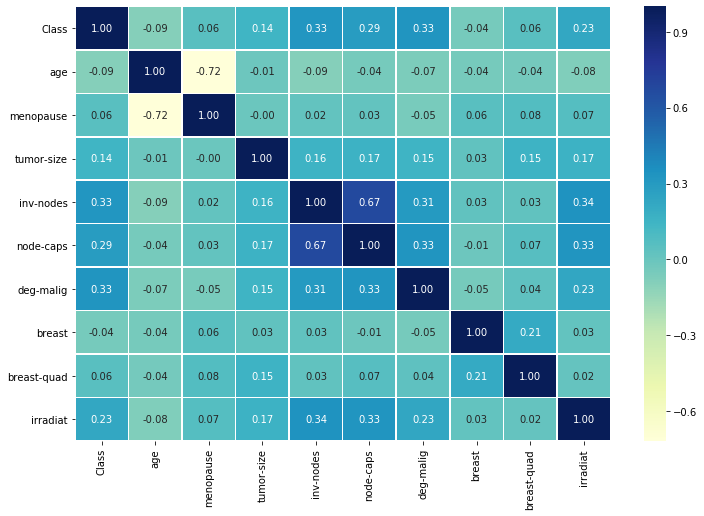

In [17]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.heatmap(breast_cancer_data.corr(), annot=True, fmt = ".2f", linewidths=.5,
            ax=ax, cmap = "YlGnBu") #checking correlation among numerical data

# Oversampling to address Dataset Imbalance:

In [18]:
# Split-out Validation Dataset and Create Test Variables

X = breast_cancer_data.drop(columns='Class')
y = breast_cancer_data['Class'].copy()

smote = SMOTE() #oversampling with SMOTE function

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

validation_size = 0.20
seed = 0

#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=validation_size, random_state=seed)

In [19]:
X_train.head() #print first few rows

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
218,1,2,4,4,1,3,0,1,1
254,2,0,4,1,1,3,0,3,1
299,4,0,3,0,0,3,0,1,0
191,3,2,1,4,0,1,1,2,0
56,3,0,0,0,0,1,1,0,0


In [20]:
#standardize
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


# Building the Model

In [21]:
num_folds = 10
scoring = 'accuracy'

# Params for Random Forest
num_trees = 100
max_features = 5



#Trying Different Types of Classifiers
models = []
models.append(('LR', LogisticRegression(random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)))
models.append(('CART', DecisionTreeClassifier(max_leaf_nodes=19, random_state=0)))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('SVM', SVC(kernel = 'linear', random_state = 0)))

# evalutate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.658468 (0.081032)
KNN: 0.734980 (0.069354)
CART: 0.715827 (0.042570)
NB: 0.658367 (0.093275)
RF: 0.754637 (0.062160)
SVM: 0.674496 (0.078944)


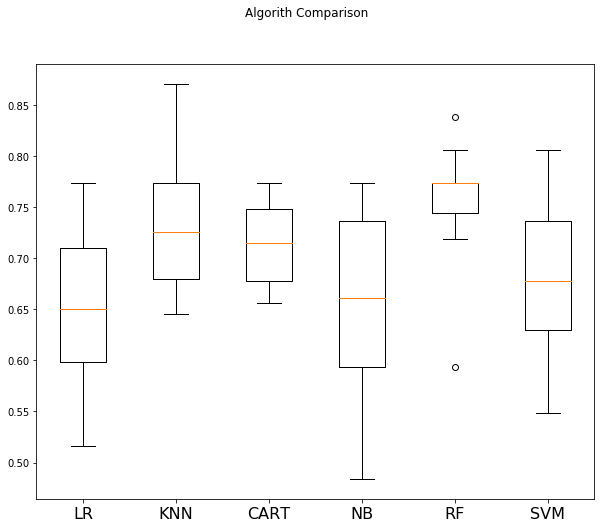

In [22]:
#plot algorithm accuracuricies
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, fontsize=16)
plt.show()

# ROC AUC CHECKING

In [30]:
# Finalizing the model
random_forest = RandomForestClassifier(n_estimators=100,max_features=5)

random_forest.fit(X_train, y_train)

predictions = random_forest.predict(X_test)
print("RF Accuracy: %s%%" % (100*accuracy_score(y_test, predictions)))

# Finalizing the model
KNN = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
KNN.fit(X_train, y_train)
predictions1 = KNN.predict(X_test)
print("KNN Accuracy: %s%%" % (100*accuracy_score(y_test, predictions1)))


# Finalizing the model
LR = LogisticRegression(C=1)

LR.fit(X_train, y_train)

predictions2 = LR.predict(X_test)

print("LR Accuracy: %s%%" % (100*accuracy_score(y_test, predictions2)))


CART = DecisionTreeClassifier(max_leaf_nodes=19, random_state=0)

CART.fit(X_train, y_train)

predictions3 = CART.predict(X_test)

print("CART Accuracy: %s%%" % (100*accuracy_score(y_test, predictions3)))


y_score1 = LR.predict_proba(X_test)[:,1]
y_score2 = random_forest.predict_proba(X_test)[:,1]
y_score3 = CART.predict_proba(X_test)[:,1]
y_score4 = KNN.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)

print('ROC AUC Score for Logistic Regression: ', roc_auc_score(y_test, y_score1))
print('ROC AUC Score for Random Forest: ', roc_auc_score(y_test, y_score2))
print('ROC AUC Score for Decision Tree: ', roc_auc_score(y_test, y_score3))
print('ROC AUC Score for K Neareast Neighbor: ', roc_auc_score(y_test, y_score4))

RF Accuracy: 75.9493670886076%
KNN Accuracy: 70.88607594936708%
LR Accuracy: 59.49367088607595%
CART Accuracy: 67.08860759493672%
ROC AUC Score for Logistic Regression:  0.6602067183462532
ROC AUC Score for Random Forest:  0.8452842377260982
ROC AUC Score for Decision Tree:  0.7325581395348837
ROC AUC Score for K Neareast Neighbor:  0.7819767441860465


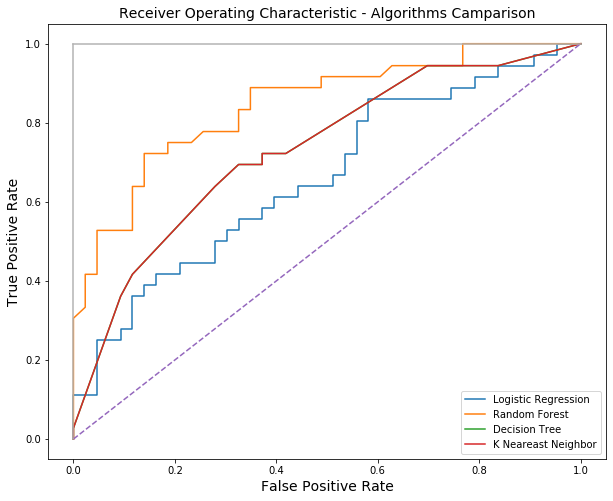

In [31]:
#algorithm camparison curves
plt.subplots(1, figsize=(10,8))
plt.title('Receiver Operating Characteristic - Algorithms Camparison',fontsize=14)
plt.plot(false_positive_rate1, true_positive_rate1, label='Logistic Regression')
plt.plot(false_positive_rate2, true_positive_rate2, label='Random Forest')
plt.plot(false_positive_rate3, true_positive_rate3, label='Decision Tree')
plt.plot(false_positive_rate3, true_positive_rate3, label='K Neareast Neighbor')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.legend()
plt.show()

# Algorithm Tuning

In [32]:
# best_estimator = 200
# best max_feature = 4

n_estimators = np.array([50,100,150,200,250])

max_features = np.array([1,2,3,4,5,6,7,8,9,10])

param_grid = dict(n_estimators=n_estimators,max_features=max_features)

model = RandomForestClassifier()

kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']

stds = grid_result.cv_results_['std_test_score']

params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.773790 using {'max_features': 4, 'n_estimators': 200}
0.751310 (0.080081) with: {'max_features': 1, 'n_estimators': 50}
0.767036 (0.056416) with: {'max_features': 1, 'n_estimators': 100}
0.751109 (0.072763) with: {'max_features': 1, 'n_estimators': 150}
0.767339 (0.059644) with: {'max_features': 1, 'n_estimators': 200}
0.763810 (0.058529) with: {'max_features': 1, 'n_estimators': 250}
0.773589 (0.056078) with: {'max_features': 2, 'n_estimators': 50}
0.767036 (0.054541) with: {'max_features': 2, 'n_estimators': 100}
0.760988 (0.063478) with: {'max_features': 2, 'n_estimators': 150}
0.757661 (0.064115) with: {'max_features': 2, 'n_estimators': 200}
0.757762 (0.063343) with: {'max_features': 2, 'n_estimators': 250}
0.767339 (0.048580) with: {'max_features': 3, 'n_estimators': 50}
0.767238 (0.058843) with: {'max_features': 3, 'n_estimators': 100}
0.773690 (0.059250) with: {'max_features': 3, 'n_estimators': 150}
0.761089 (0.065832) with: {'max_features': 3, 'n_estimators': 200}
0.7

# Final Model RF

[[32 11]
 [ 8 28]]
                      precision    recall  f1-score   support

No Recurrence Events       0.80      0.74      0.77        43
   Recurrence Events       0.72      0.78      0.75        36

            accuracy                           0.76        79
           macro avg       0.76      0.76      0.76        79
        weighted avg       0.76      0.76      0.76        79



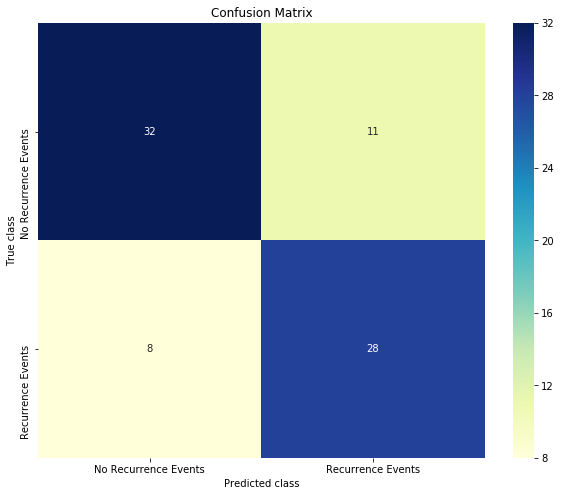

In [33]:
# Finalizing the model
random_forest = RandomForestClassifier(n_estimators=200,max_features=4)

random_forest.fit(X_train, y_train)

predictions = random_forest.predict(X_test)

class_names = ['No Recurrence Events', 'Recurrence Events']

print(confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions, target_names=class_names))



#Confusion matrix plot

cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(cm, fmt='g', cmap='YlGnBu', annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
 # Save the heatmap to file
heatmapfig = heatmap.get_figure()
heatmapfig.savefig('confusion_matrix.png')

# Model and Labels Saving

In [34]:
#saving the model and scaled data
pickle.dump(random_forest, open('cancer_model.sav', 'wb')) # saving the model

pickle.dump(scaler, open('scaling.pkl', 'wb'))

# saving label encoders
pickle.dump(age_label, open('age_label.pkl', 'wb'))
pickle.dump(menopause_label, open('menopause_label.pkl', 'wb'))
pickle.dump(tumor_size_label, open('tumor_size_label.pkl', 'wb'))
pickle.dump(inv_node_label, open('inv_node_label.pkl', 'wb'))
pickle.dump(node_caps_label, open('node_caps_label.pkl', 'wb'))
pickle.dump(breast_label, open('breast_label.pkl', 'wb'))
pickle.dump(breast_quad_label, open('breast_quad_label.pkl', 'wb'))
pickle.dump(irradiat_label, open('irradiat_label.pkl', 'wb'))

age = pickle.load(open('age_label.pkl', 'rb'))
menopause = pickle.load(open('menopause_label.pkl', 'rb'))
tumor_size = pickle.load(open('tumor_size_label.pkl', 'rb'))
inv_node = pickle.load(open('inv_node_label.pkl', 'rb'))
node_caps = pickle.load(open('node_caps_label.pkl', 'rb'))
breast = pickle.load(open('breast_label.pkl', 'rb'))
breast_quad = pickle.load(open('breast_quad_label.pkl', 'rb'))
irradiat = pickle.load(open('irradiat_label.pkl', 'rb'))


In [35]:
#prediction model function
def getPredictions(age, menopause, tumor_size, inv_node, node_caps, deg_malig, breast, breast_quad, irradiat):
    X =[[age, menopause, tumor_size, inv_node, node_caps, deg_malig, breast, breast_quad, irradiat]]
    
    random_forest = pickle.load(open('cancer_model.sav', 'rb'))
#     scaled = pickle.load(open('scaling.pkl', 'rb'))

    prediction = random_forest.predict(X)
    
    print(prediction)

In [36]:
getPredictions(5,2,3,5,1,3,1,4,0)

[1]
